<a href="https://colab.research.google.com/github/avikagupta03/TF-IDF-Call-Fraud-Analyzer/blob/main/TF_IDF_Call_Fraud_Analyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
mealss_call_transcripts_scam_determinations_path = kagglehub.dataset_download('mealss/call-transcripts-scam-determinations')

print('Data source import complete.')


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mealss/call-transcripts-scam-determinations")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/call-transcripts-scam-determinations


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import re
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
file_path = '/kaggle/input/call-transcripts-scam-determinations/BETTER30.csv'  # Replace with the appropriate file path
data = pd.read_csv(file_path)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CONVERSATION_ID    650 non-null    int64 
 1   CONVERSATION_STEP  650 non-null    int64 
 2   TEXT               650 non-null    object
 3   CONTEXT            647 non-null    object
 4   LABEL              650 non-null    object
 5   FEATURES           571 non-null    object
 6   ANNOTATIONS        255 non-null    object
dtypes: int64(2), object(5)
memory usage: 35.7+ KB


In [ ]:

# Check the unique values in the 'LABEL' column
print("Unique values in LABEL column:", data['LABEL'].unique())

# Check the distribution of the target variable (fraud vs non-fraud)
print("\nDistribution of 'LABEL' column:")
print(data['LABEL'].value_counts())

# Check missing values more specifically
print("\nMissing values by column:")
print(data.isnull().sum())

Unique values in LABEL column: ['neutral' 'slightly_suspicious' 'suspicious' 'highly_suspicious'
 'legitimate' 'scam' 'standard_opening, identification_request'
 'polite_ending' 'potential_scam' ' neutral' ' legitimate' ' scam'
 ' scam_response' ' dismissing official protocols"'
 ' emphasizing security and compliance"' ' ready for further engagement"'
 ' suggesting a dangerous situation"' 'Scam' ' adhering to protocols"'
 ' citing urgency"' 'scam_response']

Distribution of 'LABEL' column:
LABEL
neutral                                     158
 scam                                       138
 scam_response                              117
scam                                         82
legitimate                                   43
 neutral                                     35
suspicious                                   32
 legitimate                                  14
slightly_suspicious                           8
potential_scam                                7
highly_suspicious  

In [ ]:
data['LABEL'] = data['LABEL'].str.lower().str.strip()

In [ ]:
fraudulent_labels = [
    "scam", "scam_response", "suspicious", "potential_scam",
    "highly_suspicious", "slightly_suspicious", "citing urgency",
    "dismissing official protocols", "suggesting a dangerous situation"
]

In [ ]:
non_fraudulent_labels = [
    "neutral", "legitimate", "polite_ending", "standard_opening, identification_request",
    "adhering to protocols", "emphasizing security and compliance", "ready for further engagement"
]


In [ ]:
data['TARGET'] = data['LABEL'].apply(
    lambda x: 1 if x in fraudulent_labels else 0 if x in non_fraudulent_labels else None
)

In [ ]:
data = data.dropna(subset=['TARGET'])

In [ ]:
def clean_text(text):
    """Preprocess and clean the text data."""
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = ' '.join(word for word in text.split() if word not in stopwords.words('english'))  # Remove stopwords
    return text

In [ ]:
data['CLEANED_TEXT'] = data['TEXT'].apply(clean_text)

In [ ]:
tfidf = TfidfVectorizer(ngram_range=(1, 2))  # Change to include bigrams
X = tfidf.fit_transform(data['CLEANED_TEXT']).toarray()
y = data['TARGET']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
model = RandomForestClassifier(n_estimators=500, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=42)

In [ ]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8992248062015504

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.75      0.85        51
         1.0       0.86      1.00      0.92        78

    accuracy                           0.90       129
   macro avg       0.93      0.87      0.89       129
weighted avg       0.91      0.90      0.90       129



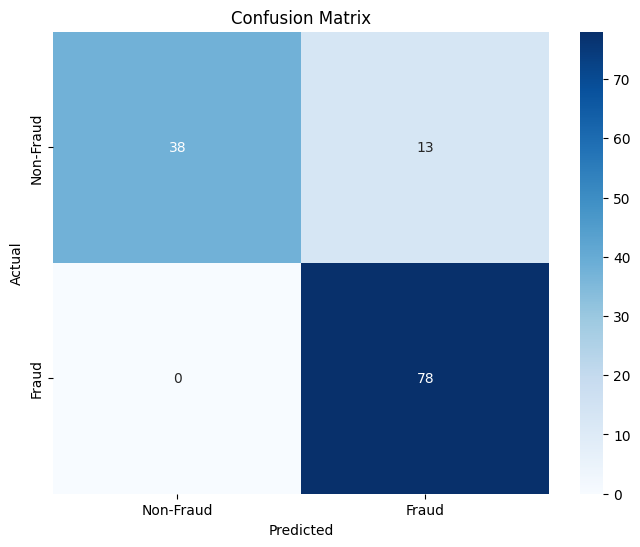

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42, class_weight={0: 1, 1: 1.2}),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42, class_weight={0: 1, 1: 1.2}),
    "Support Vector Machine": SVC(kernel='linear', random_state=42, class_weight={0: 1, 1: 1.2}),
    "Gradient Boosting (XGBoost)": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, scale_pos_weight=1.2),
    "Multinomial Naive Bayes": MultinomialNB(class_prior=[0.45, 0.55])  # Slightly adjusted prior for fraudulent class
}

In [ ]:
results= {}

In [ ]:
import pandas as pd

# Assuming 'target' is the column containing the labels (1 for fraudulent, 0 for non-fraudulent)
class_counts = pd.Series(y).value_counts()  # Count occurrences of each class
print(class_counts)


TARGET
1.0    391
0.0    252
Name: count, dtype: int64


In [ ]:
for model_name, model in models.items():
    print(f"Training and evaluating {model_name}...")
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = {
        "Accuracy": accuracy,
        "Classification Report": classification_report(y_test, y_pred)
    }


Training and evaluating Random Forest...
Training and evaluating Logistic Regression...
Training and evaluating Support Vector Machine...
Training and evaluating Gradient Boosting (XGBoost)...
Training and evaluating Multinomial Naive Bayes...


In [ ]:
print("\nModel Performance Summary:")
for model_name, metrics in results.items():
    print(f"\n{model_name}:\n")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print("Classification Report:")
    print(metrics["Classification Report"])


Model Performance Summary:

Random Forest:

Accuracy: 0.9147
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.78      0.88        51
         1.0       0.88      1.00      0.93        78

    accuracy                           0.91       129
   macro avg       0.94      0.89      0.91       129
weighted avg       0.93      0.91      0.91       129


Logistic Regression:

Accuracy: 0.8217
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.55      0.71        51
         1.0       0.77      1.00      0.87        78

    accuracy                           0.82       129
   macro avg       0.89      0.77      0.79       129
weighted avg       0.86      0.82      0.81       129


Support Vector Machine:

Accuracy: 0.9457
Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.88      0.93        51
         1.0       0.93

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
model_names = list(results.keys())
accuracies = [metrics["Accuracy"] for metrics in results.values()]

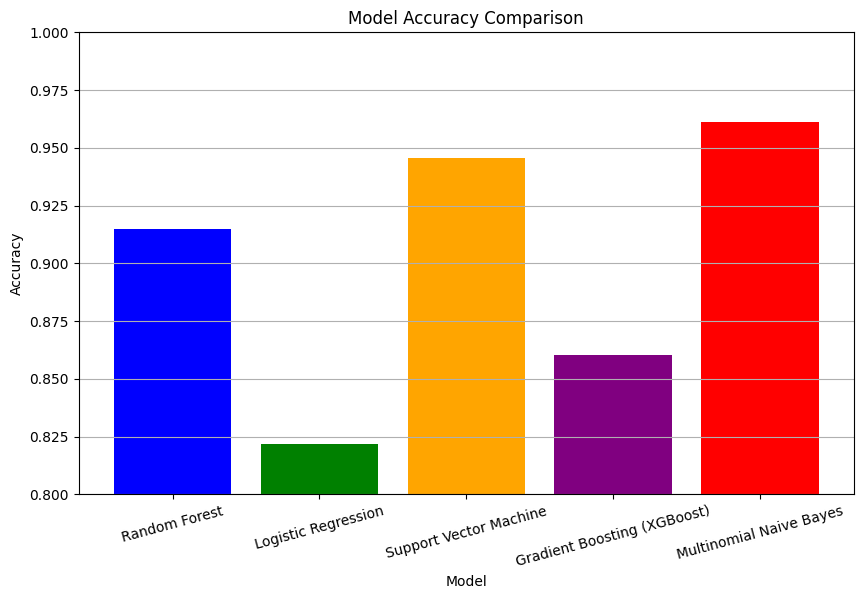

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color=['blue', 'green', 'orange', 'purple', 'red'])
plt.title("Model Accuracy Comparison")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0.8, 1.0)  # Set the y-axis range for better visualization
plt.xticks(rotation=15)
plt.grid(axis='y')
plt.show()

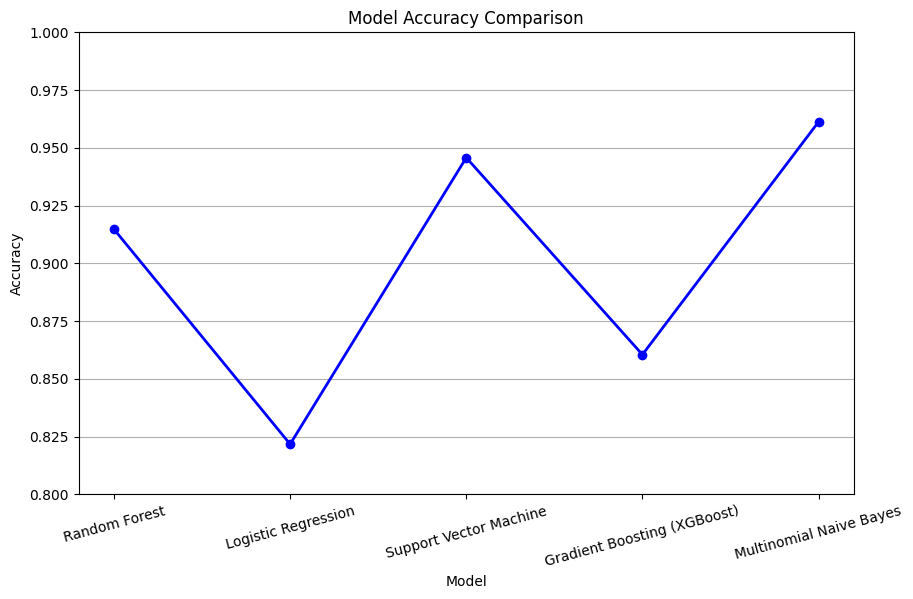

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(model_names, accuracies, marker='o', color='blue', linestyle='-', linewidth=2)
plt.title("Model Accuracy Comparison")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0.8, 1.0)  # Set the y-axis range for better visualization
plt.grid(axis='y')
plt.xticks(rotation=15)
plt.show()


In [ ]:

import re
from nltk.corpus import stopwords
nltk.download('stopwords')


# Function to preprocess user input
def preprocess_text(text):
    """Clean and preprocess the user input text."""
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = ' '.join(word for word in text.split() if word not in stopwords.words('english'))  # Remove stopwords
    return text

# Function to predict fraud status
def predict_fraud(model, text):
    """Predict if the input text represents a fraudulent call."""
    cleaned_text = preprocess_text(text)
    features = tfidf.transform([cleaned_text])  # Vectorize the input text
    prediction = model.predict(features)[0]  # Predict using the chosen model
    return "Fraudulent" if prediction == 1 else "Non-Fraudulent"

# Interactive input
print("Fraud Call Detection System")
print("Choose a model to use for prediction:")
for i, name in enumerate(models.keys(), 1):
    print(f"{i}. {name}")

model_choice = int(input("\nEnter the number corresponding to your choice: "))
chosen_model_name = list(models.keys())[model_choice - 1]
chosen_model = models[chosen_model_name]

print(f"\nUsing {chosen_model_name} for predictions.")
print("Enter a call transcript below. Type 'exit' to quit.")
while True:
    user_input = input("\nEnter Call Transcript: ")
    if user_input.lower() == 'exit':
        print("Exiting the system. Goodbye!")
        break
    result = predict_fraud(chosen_model, user_input)
    print(f"Prediction ({chosen_model_name}): {result}")


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Fraud Call Detection System
Choose a model to use for prediction:
1. Random Forest
2. Logistic Regression
3. Support Vector Machine
4. Gradient Boosting (XGBoost)
5. Multinomial Naive Bayes



Enter the number corresponding to your choice:  1



Using Random Forest for predictions.
Enter a call transcript below. Type 'exit' to quit.



Enter Call Transcript:  hey


Prediction (Random Forest): Fraudulent



Enter Call Transcript:  exit


Exiting the system. Goodbye!


In [ ]:

import re
from nltk.corpus import stopwords
nltk.download('stopwords')


# Function to preprocess user input
def preprocess_text(text):
    """Clean and preprocess the user input text."""
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = ' '.join(word for word in text.split() if word not in stopwords.words('english'))  # Remove stopwords
    return text

# Function to predict fraud status
def predict_fraud(model, text):
    """Predict if the input text represents a fraudulent call."""
    cleaned_text = preprocess_text(text)
    features = tfidf.transform([cleaned_text])  # Vectorize the input text
    prediction = model.predict(features)[0]  # Predict using the chosen model
    return "Fraudulent" if prediction == 1 else "Non-Fraudulent"

# Interactive input
print("Fraud Call Detection System")
print("Choose a model to use for prediction:")
for i, name in enumerate(models.keys(), 1):
    print(f"{i}. {name}")

model_choice = int(input("\nEnter the number corresponding to your choice: "))
chosen_model_name = list(models.keys())[model_choice - 1]
chosen_model = models[chosen_model_name]

print(f"\nUsing {chosen_model_name} for predictions.")
print("Enter a call transcript below. Type 'exit' to quit.")
while True:
    user_input = input("\nEnter Call Transcript: ")
    if user_input.lower() == 'exit':
        print("Exiting the system. Goodbye!")
        break
    result = predict_fraud(chosen_model, user_input)
    print(f"Prediction ({chosen_model_name}): {result}")


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Fraud Call Detection System
Choose a model to use for prediction:
1. Random Forest
2. Logistic Regression
3. Support Vector Machine
4. Gradient Boosting (XGBoost)
5. Multinomial Naive Bayes



Enter the number corresponding to your choice:  1



Using Random Forest for predictions.
Enter a call transcript below. Type 'exit' to quit.



Enter Call Transcript:  Hello, this is a call from your bank. We noticed some unusual activity on your account and need you to verify your details. Please press 1 to proceed


Prediction (Random Forest): Fraudulent



Enter Call Transcript:  bye


Prediction (Random Forest): Fraudulent



Enter Call Transcript:  hello


Prediction (Random Forest): Fraudulent



Enter Call Transcript:  exit


Exiting the system. Goodbye!


In [ ]:

import re
from nltk.corpus import stopwords
nltk.download('stopwords')


# Function to preprocess user input
def preprocess_text(text):
    """Clean and preprocess the user input text."""
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = ' '.join(word for word in text.split() if word not in stopwords.words('english'))  # Remove stopwords
    return text

# Function to predict fraud status
def predict_fraud(model, text):
    cleaned_text = preprocess_text(text)
    features = tfidf.transform([cleaned_text]).toarray()  # Ensure dense input
    prediction = model.predict(features)[0]  # Predict using the chosen model
    return "Fraudulent" if prediction == 1 else "Non-Fraudulent"


# Interactive input
print("Fraud Call Detection System")
print("Choose a model to use for prediction:")
for i, name in enumerate(models.keys(), 1):
    print(f"{i}. {name}")

model_choice = int(input("\nEnter the number corresponding to your choice: "))
chosen_model_name = list(models.keys())[model_choice - 1]
chosen_model = models[chosen_model_name]

print(f"\nUsing {chosen_model_name} for predictions.")
print("Enter a call transcript below. Type 'exit' to quit.")
while True:
    user_input = input("\nEnter Call Transcript: ")
    if user_input.lower() == 'exit':
        print("Exiting the system. Goodbye!")
        break
    result = predict_fraud(chosen_model, user_input)
    print(f"Prediction ({chosen_model_name}): {result}")


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Fraud Call Detection System
Choose a model to use for prediction:
1. Random Forest
2. Logistic Regression
3. Support Vector Machine
4. Gradient Boosting (XGBoost)
5. Multinomial Naive Bayes



Enter the number corresponding to your choice:  2



Using Logistic Regression for predictions.
Enter a call transcript below. Type 'exit' to quit.



Enter Call Transcript:  hey


Prediction (Logistic Regression): Fraudulent



Enter Call Transcript:  bye


Prediction (Logistic Regression): Fraudulent



Enter Call Transcript:  hay


Prediction (Logistic Regression): Fraudulent



Enter Call Transcript:  exit


Exiting the system. Goodbye!


In [ ]:

import re
from nltk.corpus import stopwords
nltk.download('stopwords')


# Function to preprocess user input
def preprocess_text(text):
    """Clean and preprocess the user input text."""
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = ' '.join(word for word in text.split() if word not in stopwords.words('english'))  # Remove stopwords
    return text

# Function to predict fraud status
def predict_fraud(model, text):
    cleaned_text = preprocess_text(text)
    features = tfidf.transform([cleaned_text]).toarray()  # Ensure dense input
    prediction = model.predict(features)[0]  # Predict using the chosen model
    return "Fraudulent" if prediction == 1 else "Non-Fraudulent"


# Interactive input
print("Fraud Call Detection System")
print("Choose a model to use for prediction:")
for i, name in enumerate(models.keys(), 1):
    print(f"{i}. {name}")

model_choice = int(input("\nEnter the number corresponding to your choice: "))
chosen_model_name = list(models.keys())[model_choice - 1]
chosen_model = models[chosen_model_name]

print(f"\nUsing {chosen_model_name} for predictions.")
print("Enter a call transcript below. Type 'exit' to quit.")
while True:
    user_input = input("\nEnter Call Transcript: ")
    if user_input.lower() == 'exit':
        print("Exiting the system. Goodbye!")
        break
    result = predict_fraud(chosen_model, user_input)
    print(f"Prediction ({chosen_model_name}): {result}")


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Fraud Call Detection System
Choose a model to use for prediction:
1. Random Forest
2. Logistic Regression
3. Support Vector Machine
4. Gradient Boosting (XGBoost)
5. Multinomial Naive Bayes



Enter the number corresponding to your choice:  5



Using Multinomial Naive Bayes for predictions.
Enter a call transcript below. Type 'exit' to quit.



Enter Call Transcript:  bye


Prediction (Multinomial Naive Bayes): Fraudulent



Enter Call Transcript:  hello


Prediction (Multinomial Naive Bayes): Non-Fraudulent



Enter Call Transcript:  click on link


Prediction (Multinomial Naive Bayes): Non-Fraudulent



Enter Call Transcript:  money  link


Prediction (Multinomial Naive Bayes): Fraudulent



Enter Call Transcript:  exit


Exiting the system. Goodbye!


In [ ]:
from sklearn.metrics import classification_report

# After training your model:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.95      0.87      0.91        83
         1.0       0.91      0.96      0.93       110

    accuracy                           0.92       193
   macro avg       0.93      0.92      0.92       193
weighted avg       0.92      0.92      0.92       193



Example testing

In [ ]:
# Example training data (replace with your actual training data)
X_train = [
    "Suspicious activity detected on your bank account. Please verify your details.",
    "Hello, thank you for your call to customer support. How can I assist you?",
    "Your bank account has been compromised. Please call us back immediately.",
    "This is a reminder for your recent order. Do you need assistance?"
]
y_train = [1, 0, 1, 0]  # Corresponding labels (1 = Fraudulent, 0 = Non-Fraudulent)

# Fit the TF-IDF Vectorizer on your training data
tfidf = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)  # Fit and transform training data

# Initialize models with class weights
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42, class_weight={0: 0.6, 1: 0.4}),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42, class_weight={0: 0.6, 1: 0.4}),
    "Support Vector Machine": SVC(kernel='linear', random_state=42, class_weight={0: 0.6, 1: 0.4}),
    "Gradient Boosting (XGBoost)": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "Multinomial Naive Bayes": MultinomialNB(class_prior=[0.6, 0.4])
}
# Fit the models on the training data
for model_name, model in models.items():
    model.fit(X_train_tfidf, y_train)  # Fit each model on the training data

# Example input texts for prediction
input_texts = [
    "This is a call from your bank regarding suspicious activity on your account. Please press 1 to verify your information.",
    "Hello, this is a customer support call regarding your recent inquiry. How can I assist you today?"
]

# Define the function to predict fraud
def predict_fraud(model, text):
    cleaned_text = text  # Apply any text preprocessing here if needed
    features = tfidf.transform([cleaned_text])  # Transform the cleaned text to feature vector
    prediction = model.predict(features)  # Get model prediction
    return "Fraudulent" if prediction[0] == 1 else "Non-Fraudulent"

# Loop through the models and predict for each input text
for text in input_texts:
    print(f"Input: {text}\n")
    for model_name, model in models.items():
        prediction = predict_fraud(model, text)
        print(f"{model_name} Prediction: {prediction}")
    print("\n" + "-"*50 + "\n")


Input: This is a call from your bank regarding suspicious activity on your account. Please press 1 to verify your information.

Random Forest Prediction: Fraudulent
Logistic Regression Prediction: Non-Fraudulent
Support Vector Machine Prediction: Non-Fraudulent
Gradient Boosting (XGBoost) Prediction: Non-Fraudulent
Multinomial Naive Bayes Prediction: Fraudulent

--------------------------------------------------

Input: Hello, this is a customer support call regarding your recent inquiry. How can I assist you today?

Random Forest Prediction: Non-Fraudulent
Logistic Regression Prediction: Non-Fraudulent
Support Vector Machine Prediction: Non-Fraudulent
Gradient Boosting (XGBoost) Prediction: Non-Fraudulent
Multinomial Naive Bayes Prediction: Non-Fraudulent

--------------------------------------------------

